In [12]:
import pandas as pd
import numpy as np

In [13]:
# X data>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
x_train = pd.read_parquet("x_train_rfe.parquet")
x_valid = pd.read_parquet("x_valid_rfe.parquet")
x_test = pd.read_parquet("x_test_rfe.parquet")

# Y data >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
y_train = pd.read_parquet("scaled_y_train_knn.parquet")
y_valid = pd.read_parquet("scaled_y_valid_knn.parquet")
y_test = pd.read_parquet("scaled_y_test_knn.parquet")

In [14]:
from time import time
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.cross_decomposition import PLSRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import catboost
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, explained_variance_score, mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")

In [15]:
regressors = [LinearRegression(), Lasso(), Ridge(), ElasticNet(),
                PLSRegression(), KNeighborsRegressor(),GradientBoostingRegressor(),ExtraTreesRegressor(),
                RandomForestRegressor(),DecisionTreeRegressor(),LGBMRegressor(),XGBRegressor(),CatBoostRegressor()]

In [16]:
for model in regressors:
    start = time()
    model.fit(x_train,y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(x_valid)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_valid, y_pred))
    print('\tRMSE: %f' % np.sqrt(mean_squared_error(y_valid, y_pred)))
    print("\tMean absolute error:", mean_absolute_error(y_valid, y_pred))
    print("\tR2 score:", r2_score(y_valid, y_pred))
    print()

LinearRegression()
	Training time: 0.077s
	Prediction time: 0.003s
	Explained variance: 0.3869823952389573
	RMSE: 0.785147
	Mean absolute error: 0.5126685558275933
	R2 score: 0.3868865942479658

Lasso()
	Training time: 0.031s
	Prediction time: 0.001s
	Explained variance: 0.0
	RMSE: 1.002895
	Mean absolute error: 0.6999698386159858
	R2 score: -0.000346810169359113

Ridge()
	Training time: 0.027s
	Prediction time: 0.004s
	Explained variance: 0.3869645665646301
	RMSE: 0.785157
	Mean absolute error: 0.5127205197545355
	R2 score: 0.3868700169724939

ElasticNet()
	Training time: 0.026s
	Prediction time: 0.002s
	Explained variance: 0.0
	RMSE: 1.002895
	Mean absolute error: 0.6999698386159858
	R2 score: -0.000346810169359113

PLSRegression()
	Training time: 0.066s
	Prediction time: 0.006s
	Explained variance: 0.3775614472559242
	RMSE: 0.791149
	Mean absolute error: 0.5141712220742796
	R2 score: 0.377477103741224

KNeighborsRegressor()
	Training time: 0.004s
	Prediction time: 11.000s
	Explained

In [18]:
finalmodel = [XGBRegressor(),RandomForestRegressor(),CatBoostRegressor()]

In [19]:
datasave = pd.DataFrame(y_test)
for model in finalmodel:
    start = time()
    model.fit(x_train,y_train)
    train_time = time() - start
    start = time()
    y_hat = model.predict(x_test)
    predict_time = time()-start
    data = pd.DataFrame(y_hat)
    datasave = pd.concat([datasave,data],axis=1)    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_hat))
    print('\tRMSE: %f' % np.sqrt(mean_squared_error(y_test, y_hat)))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_hat))
    print("\tMean absolute percentage error",mean_absolute_percentage_error(y_test,y_hat))
    print("\tR2 score:", r2_score(y_test, y_hat))
    print()

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
	Training time: 2.131s
	Prediction time: 0.013s
	Explained variance: 0.5783483347313111
	RMSE: 0.656442
	Mean absolute error: 0.4234097655600256
	Mean absolute percentage error 2.7138122469982457
	R2 score: 0.5783390591158284

RandomForestRegressor()
	Training time: 31.206s
	Prediction time: 0.421s
	Explained 

In [20]:
datasave.columns.values[0] = 'original'
datasave.columns.values[1] = 'XGB'
datasave.columns.values[2] = 'RF'

In [21]:
datasave

,original,XGB,RF,0
0,-1.550029,-1.456109,-1.478410,-1.578104
1,-0.246657,0.174514,0.101743,0.188149
2,-0.088005,-0.290228,-0.228885,-0.220705
3,0.399697,0.385834,0.647872,0.507272
4,0.090674,-0.003619,0.242860,0.525198
...,...,...,...,...
11083,-0.361799,-0.480085,-0.790605,-0.731945
11084,-0.077382,-0.501108,-0.755324,-0.589944
11085,0.563146,0.818388,0.667005,0.799961
11086,-0.076498,-0.017471,-0.107239,-0.046072


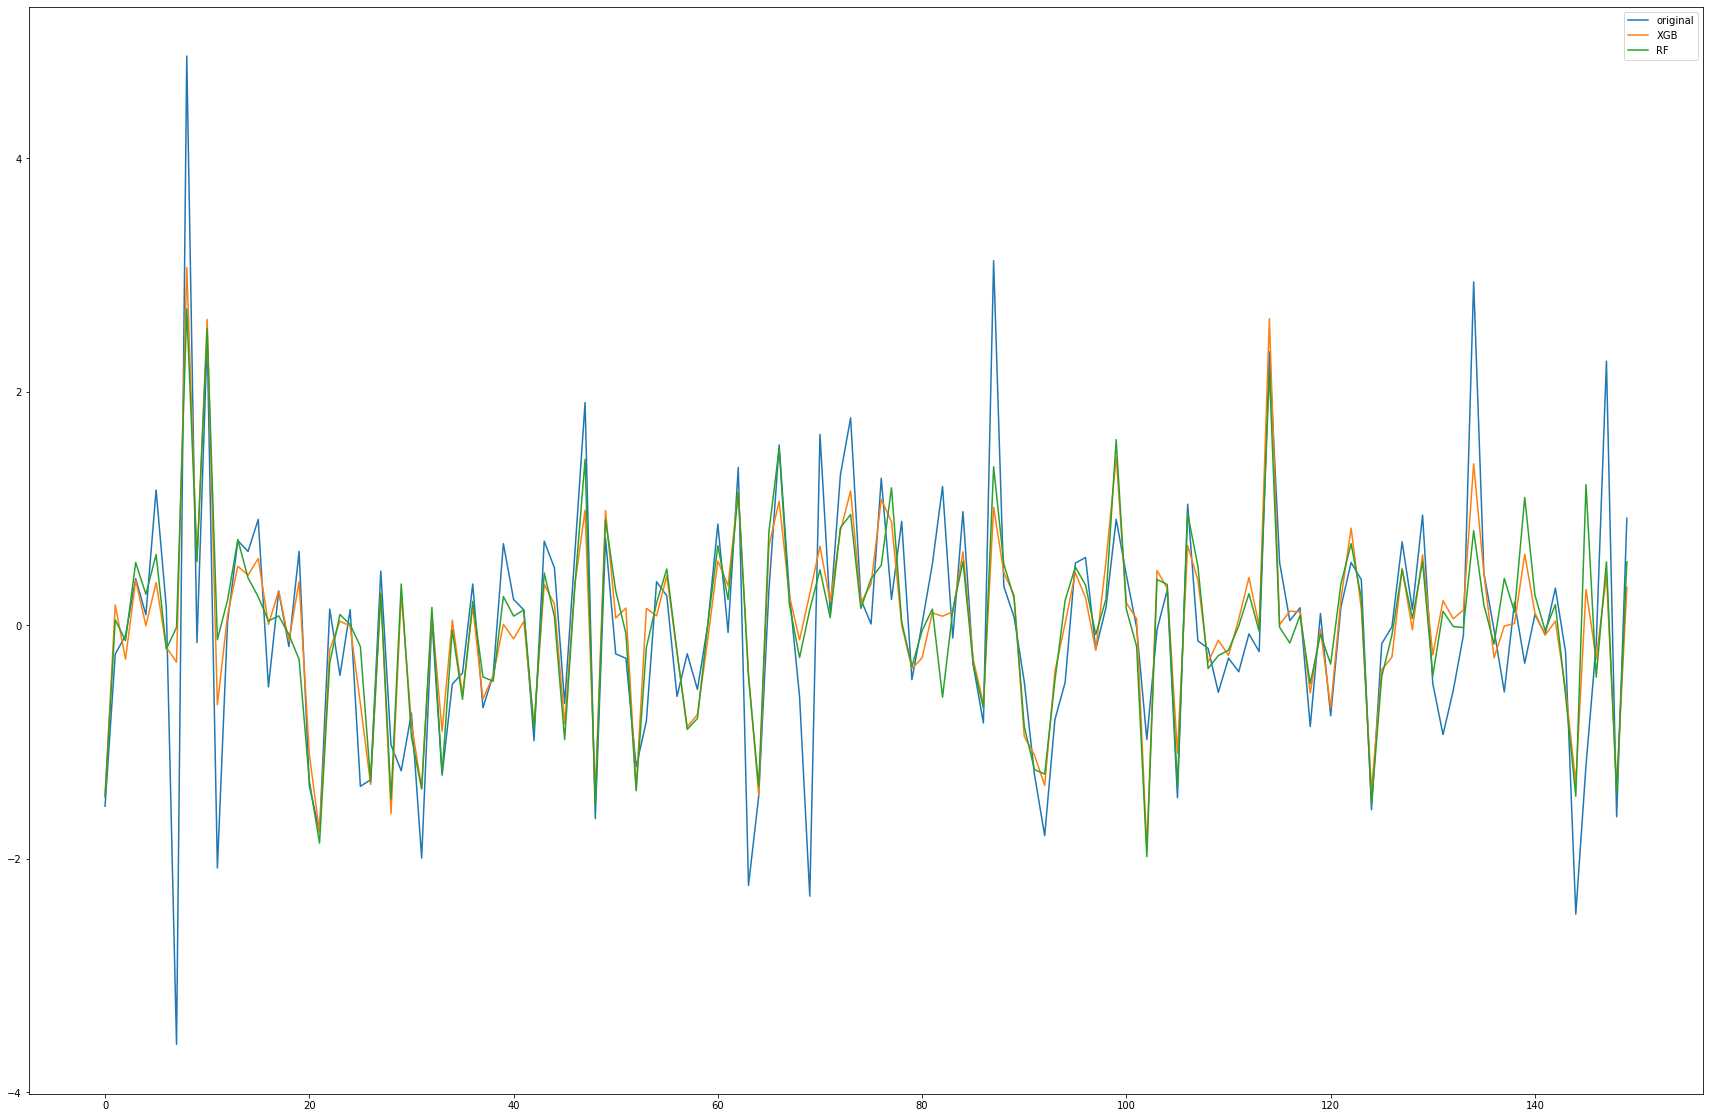

In [10]:
# Graph
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,20))
plt.plot(datasave[:150])
plt.legend(['original','XGB','RF'])